In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [97]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Test url.
test = requests.get(url)
test

<Response [400]>

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | price
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | shubarkuduk
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | limoges
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | san andres
Processing Record 14 of Set 1 | akyab
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | stokmarknes
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | taltal
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | la ron

Processing Record 39 of Set 4 | flinders
Processing Record 40 of Set 4 | bulgan
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | belmonte
Processing Record 43 of Set 4 | luga
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | arinos
Processing Record 48 of Set 4 | quang ngai
Processing Record 49 of Set 4 | tuatapere
Processing Record 50 of Set 4 | ulladulla
Processing Record 1 of Set 5 | canitas
City not found. Skipping...
Processing Record 2 of Set 5 | kutahya
Processing Record 3 of Set 5 | crossgates
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | andijon
Processing Record 6 of Set 5 | leopold
Processing Record 7 of Set 5 | taikang
Processing Record 8 of Set 5 | maralal
Processing Record 9 of Set 5 | cherkasskoye
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | morondava
Processing Record 12 of Set 5 | lingao
Proce

Processing Record 32 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 33 of Set 8 | saint-joseph
Processing Record 34 of Set 8 | trelleborg
Processing Record 35 of Set 8 | bereda
Processing Record 36 of Set 8 | acari
Processing Record 37 of Set 8 | zastron
Processing Record 38 of Set 8 | eydhafushi
Processing Record 39 of Set 8 | praia
Processing Record 40 of Set 8 | khor
Processing Record 41 of Set 8 | qinhuangdao
Processing Record 42 of Set 8 | dargaville
Processing Record 43 of Set 8 | severo-yeniseyskiy
Processing Record 44 of Set 8 | gangotri
City not found. Skipping...
Processing Record 45 of Set 8 | iqaluit
Processing Record 46 of Set 8 | kielce
Processing Record 47 of Set 8 | tawnat
City not found. Skipping...
Processing Record 48 of Set 8 | lincoln
Processing Record 49 of Set 8 | pervouralsk
Processing Record 50 of Set 8 | udachnyy
Processing Record 1 of Set 9 | cherskiy
Processing Record 2 of Set 9 | la romana
Processing Record 3 of Set 9 | columbus
Processing

Processing Record 18 of Set 12 | victoria
Processing Record 19 of Set 12 | viligili
City not found. Skipping...
Processing Record 20 of Set 12 | aalter
Processing Record 21 of Set 12 | vodstroy
Processing Record 22 of Set 12 | plouzane
Processing Record 23 of Set 12 | tete
Processing Record 24 of Set 12 | nantucket
Processing Record 25 of Set 12 | whitianga
Processing Record 26 of Set 12 | virginia
Processing Record 27 of Set 12 | along
Processing Record 28 of Set 12 | ust-kuyga
Processing Record 29 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 30 of Set 12 | the pas
Processing Record 31 of Set 12 | turiacu
Processing Record 32 of Set 12 | moerai
Processing Record 33 of Set 12 | rosario oeste
Processing Record 34 of Set 12 | waipawa
Processing Record 35 of Set 12 | aasiaat
Processing Record 36 of Set 12 | kysyl-syr
Processing Record 37 of Set 12 | bargal
City not found. Skipping...
Processing Record 38 of Set 12 | baley
Processing Record 39 of Set 12 | oksbol
Pro

In [20]:
len(city_data)

576

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,82.29,58,47,12.12,PG,2022-02-11 22:35:18
1,Price,39.5994,-110.8107,54.66,24,0,19.57,US,2022-02-11 22:35:18
2,Albany,42.6001,-73.9662,48.85,51,89,9.80,US,2022-02-11 22:35:18
3,Hobart,-42.8794,147.3294,62.11,61,75,8.05,AU,2022-02-11 22:35:18
4,Shubarkuduk,49.1447,56.4872,27.18,97,100,8.37,KZ,2022-02-11 22:35:19
5,Kavaratti,10.5669,72.6420,80.06,76,20,8.10,IN,2022-02-11 22:35:19
6,Hermanus,-34.4187,19.2345,65.89,89,0,8.23,ZA,2022-02-11 22:35:19
7,Jamestown,42.0970,-79.2353,49.08,56,100,21.85,US,2022-02-11 22:32:41
8,Limoges,45.7500,1.3333,36.16,75,0,13.80,FR,2022-02-11 22:35:20
9,Carnarvon,-24.8667,113.6333,77.07,78,40,4.61,AU,2022-02-11 22:35:20


In [26]:
# Re-order columns: 'City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'
city_data_df = city_data_df[['City', 'Country', 'Date', 
                                       'Lat', 'Lng', 'Max Temp', 
                                       'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samarai,PG,2022-02-11 22:35:18,-10.6167,150.6667,82.29,58,47,12.12
1,Price,US,2022-02-11 22:35:18,39.5994,-110.8107,54.66,24,0,19.57
2,Albany,US,2022-02-11 22:35:18,42.6001,-73.9662,48.85,51,89,9.80
3,Hobart,AU,2022-02-11 22:35:18,-42.8794,147.3294,62.11,61,75,8.05
4,Shubarkuduk,KZ,2022-02-11 22:35:19,49.1447,56.4872,27.18,97,100,8.37
5,Kavaratti,IN,2022-02-11 22:35:19,10.5669,72.6420,80.06,76,20,8.10
6,Hermanus,ZA,2022-02-11 22:35:19,-34.4187,19.2345,65.89,89,0,8.23
7,Jamestown,US,2022-02-11 22:32:41,42.0970,-79.2353,49.08,56,100,21.85
8,Limoges,FR,2022-02-11 22:35:20,45.7500,1.3333,36.16,75,0,13.80
9,Carnarvon,AU,2022-02-11 22:35:20,-24.8667,113.6333,77.07,78,40,4.61


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

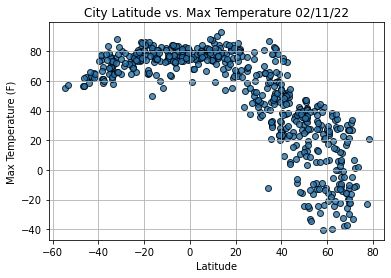

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

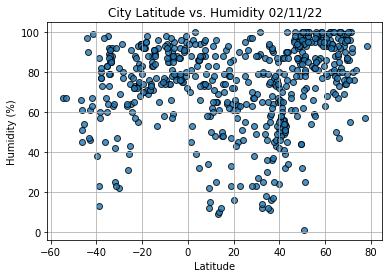

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

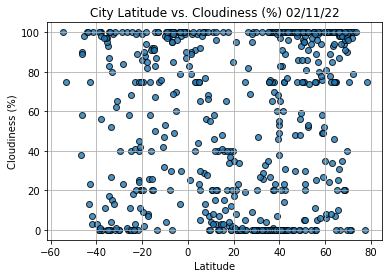

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

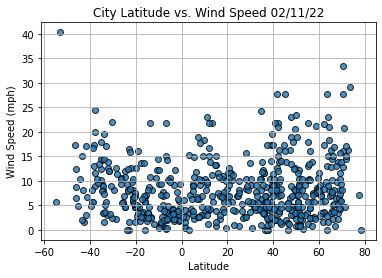

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create new df from current df row index 13 using loc method.
# The loc method accesses a group of rows & columns in a DataFrame by an index, labels, or a Boolean array.
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2022-02-11 22:35:21
Lat                       22.0752
Lng                      -159.319
Max Temp                    81.48
Humidity                       63
Cloudiness                      0
Wind Speed                   5.75
Name: 13, dtype: object

In [36]:
# Filter df based on a value of rows to show which are Northern Hemisphere latitudes (latitudes greater than or equal to 0)
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
571     True
572    False
573     True
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [38]:
# Return df with all data fitting the criteria above using the loc()method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Price,US,2022-02-11 22:35:18,39.5994,-110.8107,54.66,24,0,19.57
2,Albany,US,2022-02-11 22:35:18,42.6001,-73.9662,48.85,51,89,9.80
4,Shubarkuduk,KZ,2022-02-11 22:35:19,49.1447,56.4872,27.18,97,100,8.37
5,Kavaratti,IN,2022-02-11 22:35:19,10.5669,72.6420,80.06,76,20,8.10
7,Jamestown,US,2022-02-11 22:32:41,42.0970,-79.2353,49.08,56,100,21.85


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

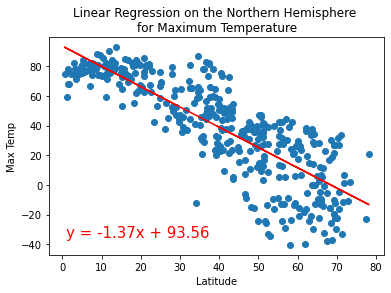

In [84]:
# Linear regression on Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(1,-35))

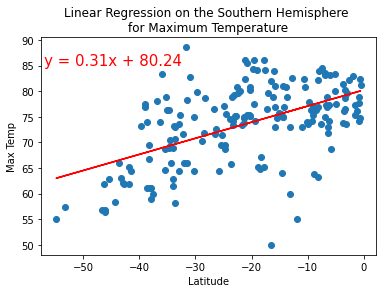

In [60]:
# Linear regression on Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-57,85))

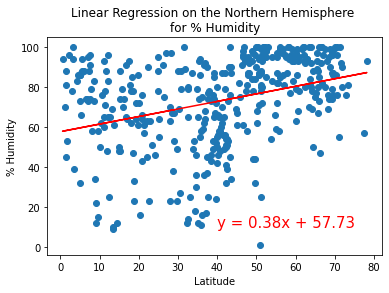

In [91]:
# Linear regression on Northern Hemisphere %Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

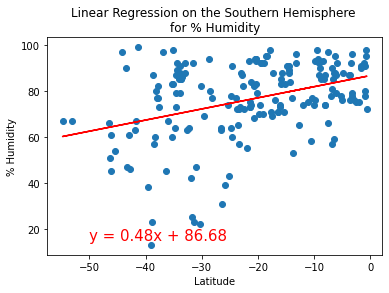

In [64]:
# Linear regression on Southern Hemisphere %Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

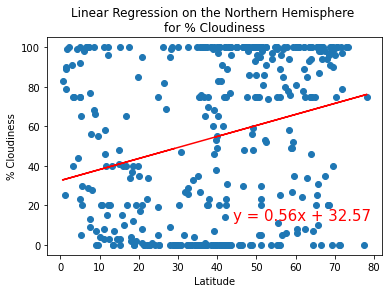

In [73]:
# Linear regression on Northern Hemisphere %Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(44,12.5))

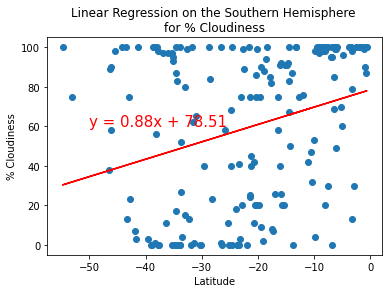

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# The correlation coefficient, or r-value, shows the strength of the relationship between the fitted line and the data.
# A correlation coefficient close to 1 shows a strong positive correlation.
# Close to –1 shows a strong negative correlation.
# Close to zero is no correlation.

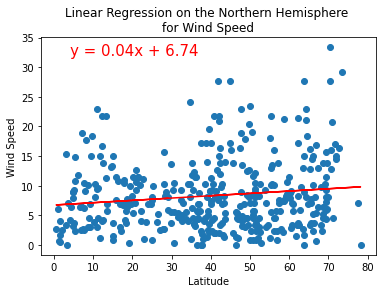

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(4,32))

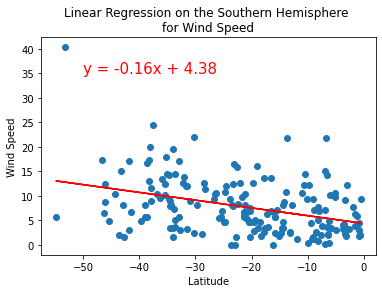

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))